矩阵运算、表格处理、可视化，数据存取


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import pickle

import warnings
warnings.filterwarnings('ignore')

Sklearn

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

KNN Package

SVM Package

DT Package

XGBoost Package

Deeplearning Package

In [6]:
pass

读取数据

In [16]:
with open('heart.pickle','rb') as read_file:
    df_raw = pickle.load(read_file)

df = df_raw.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


初步可视化看个大概

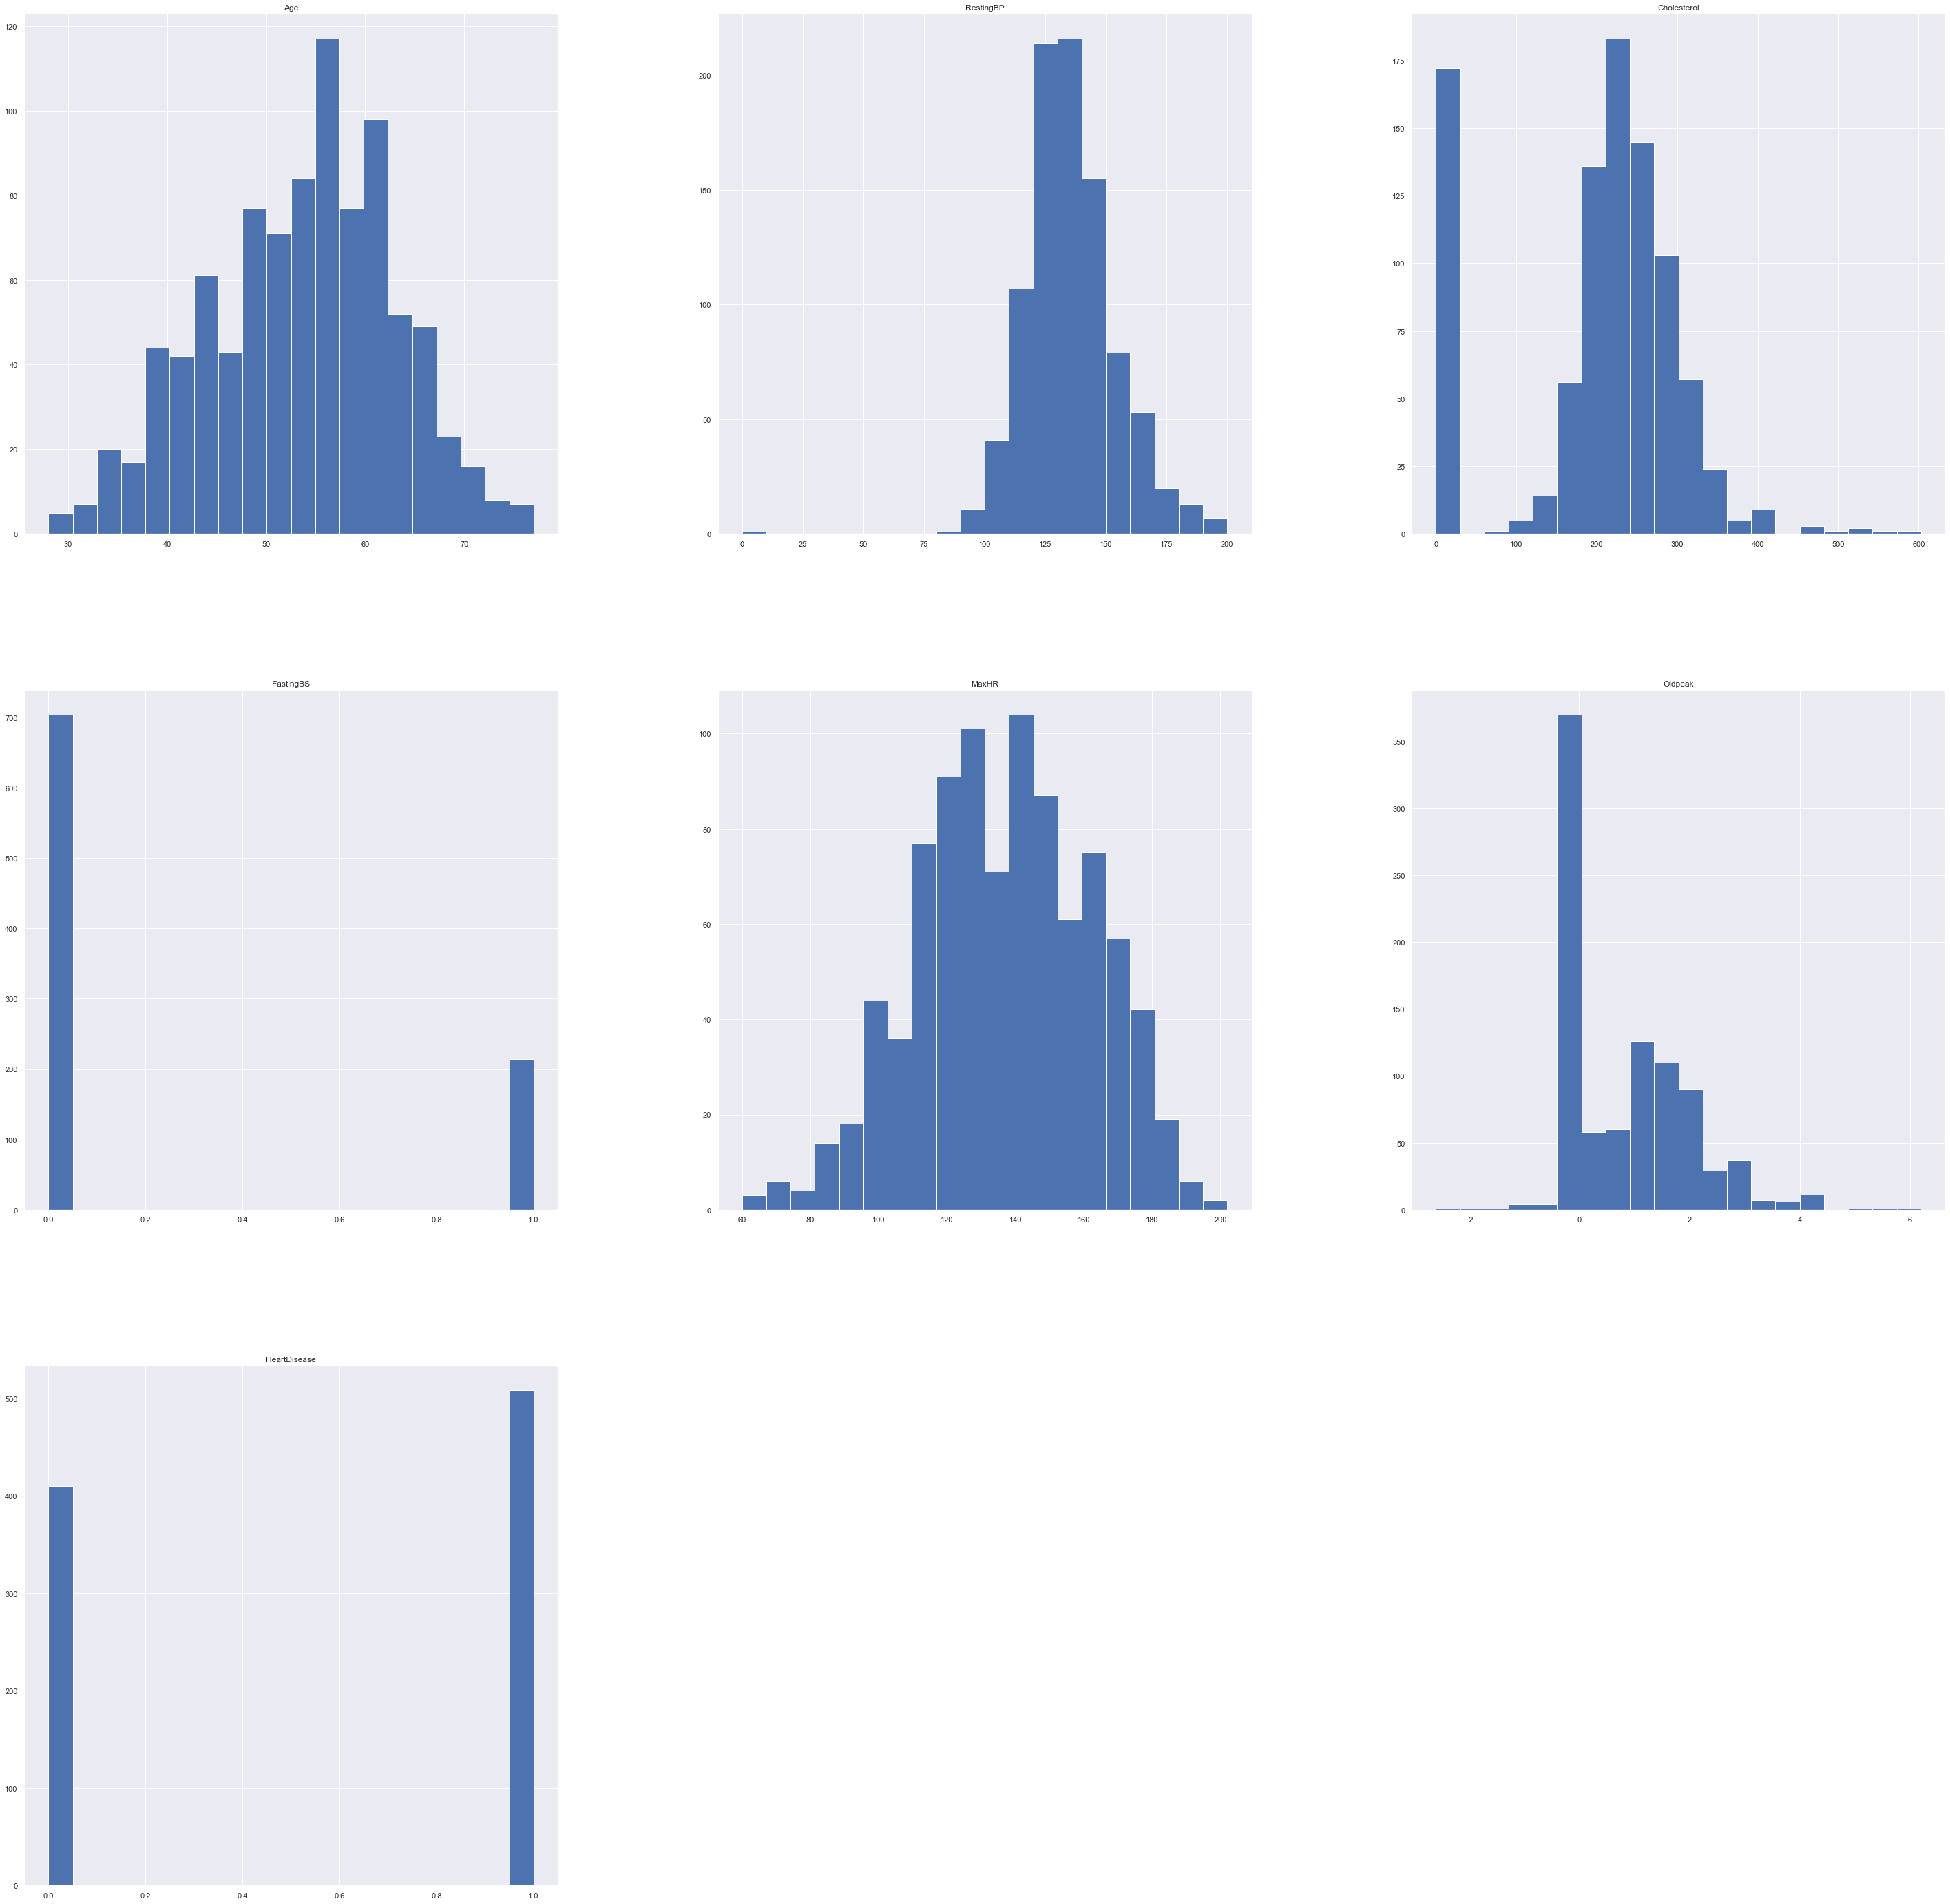

In [17]:
df.hist(bins=20,figsize=(50,50))
plt.show()

特征的基本信息：
- Age: age of the patient [years] 
- Sex: sex of the patient [M: Male, F: Female] 
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 
- RestingBP: resting blood pressure [mm Hg] 
- Cholesterol: serum cholesterol [mm/dl] 
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 
- Oldpeak: oldpeak = ST [Numeric value measured in depression] 
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 

- HeartDisease: output class [1: heart disease, 0: Normal]

In [18]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(sort=True, normalize=True))
    print('\n')

Age
54    0.055556
58    0.045752
55    0.044662
56    0.041394
57    0.041394
52    0.039216
51    0.038126
59    0.038126
62    0.038126
53    0.035948
60    0.034858
48    0.033769
61    0.033769
63    0.032680
50    0.027233
46    0.026144
41    0.026144
43    0.026144
64    0.023965
65    0.022876
49    0.022876
47    0.020697
44    0.020697
42    0.019608
45    0.019608
38    0.017429
67    0.016340
39    0.016340
66    0.014161
69    0.014161
40    0.014161
35    0.011983
37    0.011983
68    0.010893
34    0.007625
74    0.007625
70    0.007625
36    0.006536
71    0.005447
32    0.005447
72    0.004357
29    0.003268
75    0.003268
33    0.002179
77    0.002179
76    0.002179
31    0.002179
30    0.001089
28    0.001089
73    0.001089
Name: Age, dtype: float64


Sex
M    0.78976
F    0.21024
Name: Sex, dtype: float64


ChestPainType
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64


RestingBP
120    0.143791
130    0.128540
14

对Sex、ChestPainType、RestingECG、ExerciseAngina、ST_Slope进行硬编码